# Here We have done the data collection 

by writing r in the before the string we can make the python string and it will take the path as it is

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Using excel data using the pandas package and making a train_data frame 

In [2]:
train_data = pd.read_excel('Data_Train.xlsx')

In [3]:

train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# Now we will do the data cleaning
1. Fixing the typo 
2. Managing the missing values

In [4]:
train_data.info()
# will return data type and the count of non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Since we have very few missing vlaues
We should see following
1. Can we delete these missing values

In [6]:
# obtaining the null values rows 
train_data[train_data['Total_Stops'].isnull()]
# NaN = not available number

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


### A doubt can come like when can we remove the data or delete the row of a missing value
1. How to determine such things

In [7]:
#can you find the average price, maxium price and minimum price of the flight
print('Mean Price',train_data['Price'].mean())
print('Maximum Price',train_data['Price'].max())
print('Minimum Price',train_data['Price'].min())

Mean Price 9087.064120565385
Maximum Price 79512
Minimum Price 1759


In [8]:
# The dropna() method removes the rows that contains NULL values. 

train_data.dropna(inplace = True)
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [9]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

int64 data type meaning 
[2^(n-1) -1 ] to [2^n -1] it can store

In [10]:
# to get the accurate memory usage of the dataframe train_data
train_data.info(memory_usage='deep')    

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 6.3 MB


In [11]:
# Making a copy of data frame
data = train_data.copy()

In [12]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [13]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

We have to convert the object type(similar to string) to numeric data

In [14]:
# Extracting the day and month from the date_of_journey
# converting the data_of_journey(object type similar to string) data type to datetime(timestamp)
# data types after conversion should be datetime64[ns] or M8[ns]

def change_into_datetime(col):
    data[col] = pd.to_datetime(data[col])


In [15]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [16]:
from warnings import filterwarnings
filterwarnings('ignore')

In [17]:
for feature in ['Date_of_Journey', 'Dep_Time', 'Arrival_Time']:
    change_into_datetime(feature)

In [18]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [19]:
data['Journey_day'] = data['Date_of_Journey'].dt.day

In [20]:
data['Journey_month'] = data['Date_of_Journey'].dt.month

In [21]:
data['Journey_year'] = data['Date_of_Journey'].dt.year

In [22]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-03-30 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-03-30 05:50:00,2024-03-30 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019


Cleaning the Dep_Time feature and the Arrival_Time feature

In [23]:
# we have to extract Dep_hour and Dep_Min same for arrival

def extract_hour_min(df, col):
    df[col + '_hour'] = df[col].dt.hour
    df[col+ '_min'] = df[col].dt.minute
    return df.head(3)

In [24]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_month',
       'Journey_year'],
      dtype='object')

In [25]:
extract_hour_min(data, 'Dep_Time')


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-03-30 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-03-30 05:50:00,2024-03-30 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-03-30 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25


In [26]:
extract_hour_min(data, 'Arrival_Time')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-03-30 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-03-30 05:50:00,2024-03-30 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-03-30 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


Now we can drop Dep_Time and Arrival_Time because we have done the extraction from them

In [27]:
cols_to_drop = ['Arrival_Time','Dep_Time']
data.drop(cols_to_drop, axis = 1, inplace= True)

In [28]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Airline            10682 non-null  object        
 1   Date_of_Journey    10682 non-null  datetime64[ns]
 2   Source             10682 non-null  object        
 3   Destination        10682 non-null  object        
 4   Route              10682 non-null  object        
 5   Duration           10682 non-null  object        
 6   Total_Stops        10682 non-null  object        
 7   Additional_Info    10682 non-null  object        
 8   Price              10682 non-null  int64         
 9   Journey_day        10682 non-null  int32         
 10  Journey_month      10682 non-null  int32         
 11  Journey_year       10682 non-null  int32         
 12  Dep_Time_hour      10682 non-null  int32         
 13  Dep_Time_min       10682 non-null  int32         
 14  Arrival_Tim

# Data Analysis Part

### Questions to answer
1. When will most of the flights take-off

In [30]:
def flight_departure_time(x):
    if (x > 4) and (x <=8):
        return "Early Morning"
    elif (x > 8) and (x <= 12):
        return "Morning"
    elif (x > 12) and (x <= 16):
        return "Afternoon"
    elif (x > 20 ) and (x <= 24):
        return "Night"
    else:
        return "Late Night"
        

In [128]:
data['Dep_Time_hour'].apply(flight_departure_time).value_counts()

Dep_Time_hour
Early Morning    2880
Late Night       2822
Morning          2209
Afternoon        1731
Night            1040
Name: count, dtype: int64

<Axes: xlabel='Dep_Time_hour'>

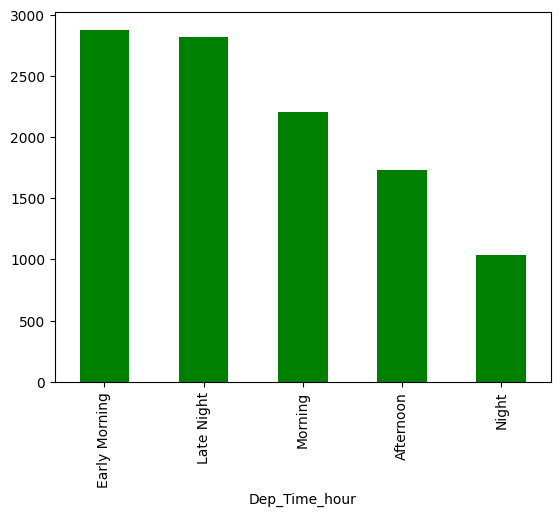

In [31]:
data['Dep_Time_hour'].apply(flight_departure_time).value_counts().plot(kind= 'bar', color = 'green')

In [32]:
# following code should be written to use the cufflinks 

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

print(__version__) # requires version >= 1.9.0
# For Notebooks
init_notebook_mode(connected=True)
# For offline use
cf.go_offline()

5.19.0


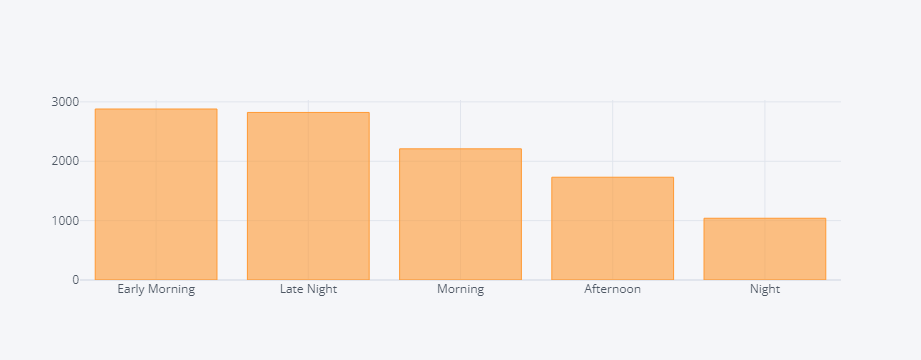

In [33]:
data['Dep_Time_hour'].apply(flight_departure_time).value_counts().iplot(kind = 'bar')

## changing the string data of column duration to numerical value
1. some values do not have hour or min so do preprocessing accordingly 
2. Desgin a funciton for it

In [34]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


In [35]:
# 50m -> 0h 50m
# 2h -> 2h 0m

def preprocess_duration(x):
    if 'h' not in x:
        x = '0h' + ' ' + x
    elif 'm' not in x:
        x = x + ' ' + '0m'
    
    
    return x

In [36]:
data['Duration'] = data['Duration'].apply(preprocess_duration)

In [37]:
type(data['Duration'][0].split(' ')[0][0:-1])

str

In [38]:
data['Duration'][0].split(' ')[0][0:-1]

'2'

In [39]:
data['Duration_Hour'] = data['Duration'].apply(lambda x : int(x.split(' ')[0][0:-1]))
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_min',
       'Arrival_Time_hour', 'Arrival_Time_min', 'Duration_Hour'],
      dtype='object')

In [40]:
data['Duration_Hour']

0         2
1         7
2        19
3         5
4         4
         ..
10678     2
10679     2
10680     3
10681     2
10682     8
Name: Duration_Hour, Length: 10682, dtype: int64

In [41]:
data['Duration_Minutes'] = data['Duration'].apply(lambda x : int(x.split(' ')[1][0:-1]))
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_min',
       'Arrival_Time_hour', 'Arrival_Time_min', 'Duration_Hour',
       'Duration_Minutes'],
      dtype='object')

In [42]:
data['Duration_Minutes']

0        50
1        25
2         0
3        25
4        45
         ..
10678    30
10679    35
10680     0
10681    40
10682    20
Name: Duration_Minutes, Length: 10682, dtype: int64

In [43]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_min',
       'Arrival_Time_hour', 'Arrival_Time_min', 'Duration_Hour',
       'Duration_Minutes'],
      dtype='object')

## Now we have extracted Duration_Hour and Duration_Mintues from the Duration columns

In [44]:
data['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

Making a new feature named total_Duration

In [45]:
data['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [46]:
eval('2*14')

28

In [47]:
data['Duration'].str.replace('h', '*60')

0        2*60 50m
1        7*60 25m
2        19*60 0m
3        5*60 25m
4        4*60 45m
           ...   
10678    2*60 30m
10679    2*60 35m
10680     3*60 0m
10681    2*60 40m
10682    8*60 20m
Name: Duration, Length: 10682, dtype: object

In [48]:
data['Duration_Total_Minutes'] = data['Duration'].str.replace('h', '*60').str.replace(' ', '+').str.replace('m', '*1').apply(eval)

In [49]:
data["Duration_Total_Minutes"].head(3)

0     170
1     445
2    1140
Name: Duration_Total_Minutes, dtype: int64

## Scatter plot and Regression plots

<Axes: xlabel='Duration_Total_Minutes', ylabel='Price'>

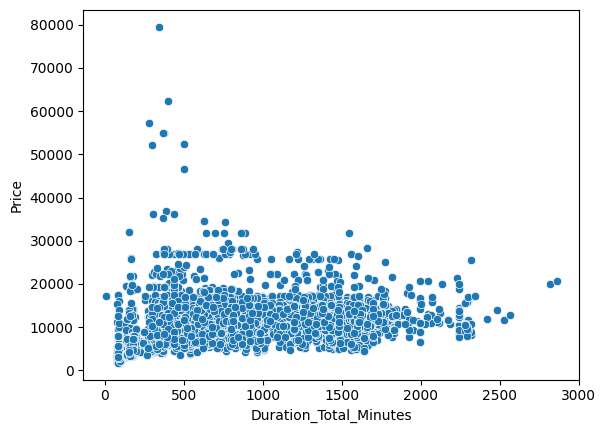

In [50]:
# creating scatter plots

sns.scatterplot(x = 'Duration_Total_Minutes', y = 'Price', data = data)

<Axes: xlabel='Duration_Total_Minutes', ylabel='Price'>

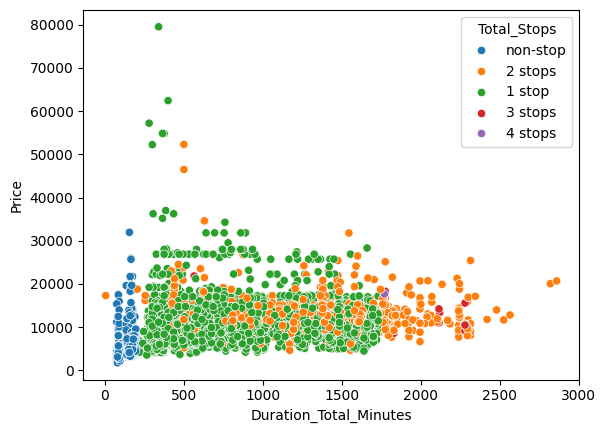

In [51]:
# creating scatter plots

sns.scatterplot(x = 'Duration_Total_Minutes', y = 'Price', data = data, hue = 'Total_Stops')

In [52]:
import seaborn as sns

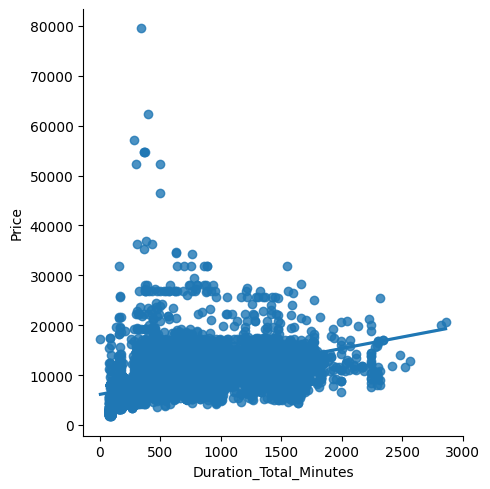

In [53]:
# lmplot() method is used to plot data and draw regression model fits across grids where multiple plots can be plotted

sns.lmplot(x = 'Duration_Total_Minutes', y = 'Price', data = data)

As the duraiton increase price will also increase 

# Problem Statements
### 1. On which routs Jet Airways is extremely used
### 2. Airline Vs Price Analysis

In [54]:
data[data['Airline'] == 'Jet Airways'].groupby('Route').size().sort_values(ascending = False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
DEL → JAI → BOM → COK    207
BOM → HYD                207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
BOM → IDR → DEL → HYD      1
BOM → VNS → DEL → HYD      1
BOM → DED → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → UDR → DEL → HYD      1
DEL → CCU → BOM → COK      1
dtype: int64

Now we do Airline Vs Price Analysis
1. Airline -> Minimum Price
2. Airline -> price median, mean, a particular percentile, a maximum value
3. we will do this using box plot

In [55]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_min',
       'Arrival_Time_hour', 'Arrival_Time_min', 'Duration_Hour',
       'Duration_Minutes', 'Duration_Total_Minutes'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

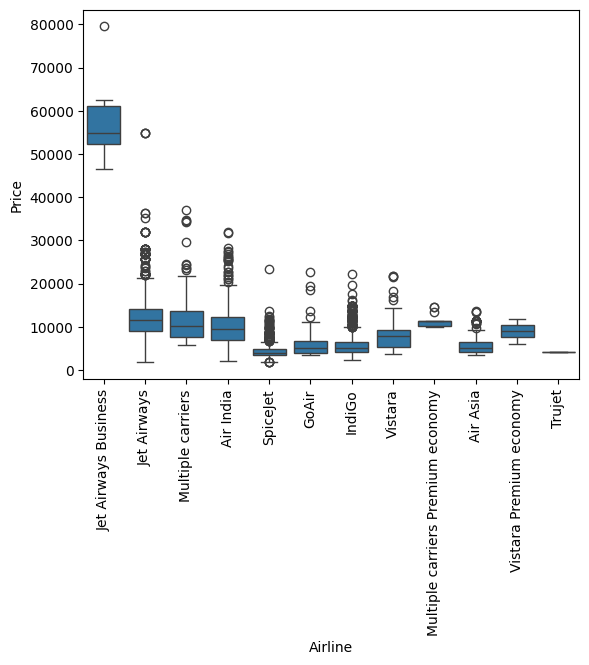

In [56]:
sns.boxplot(y = 'Price', x = 'Airline', data = data.sort_values('Price', ascending= False))
# fixing the overlapping rotation of x axis
plt.xticks(rotation = 'vertical')
plt.show

# Feature Engineering

## Feture Encoding 
1. Converting your categorical features into numerical features is feature encoding
2. 1-hot encoding
3. Completely from scrath 

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Airline                 10682 non-null  object        
 1   Date_of_Journey         10682 non-null  datetime64[ns]
 2   Source                  10682 non-null  object        
 3   Destination             10682 non-null  object        
 4   Route                   10682 non-null  object        
 5   Duration                10682 non-null  object        
 6   Total_Stops             10682 non-null  object        
 7   Additional_Info         10682 non-null  object        
 8   Price                   10682 non-null  int64         
 9   Journey_day             10682 non-null  int32         
 10  Journey_month           10682 non-null  int32         
 11  Journey_year            10682 non-null  int32         
 12  Dep_Time_hour           10682 non-null  int32      

In [58]:
# Finding all the categorical columns 

cat_col = [col for col in data.columns if data[col].dtype == 'object']
cat_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [59]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [60]:
data['Source'].apply(lambda x : 1 if x == 'Banglore' else 0)

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

In [61]:
# code for one-hot encoding 
# do it for nominal data not for ordinal data and keep in mind about the Dimensionality 
for sub_category in data['Source'].unique():
    data['Source_' + sub_category] =  data['Source'].apply(lambda x : 1 if x == sub_category else 0)

In [62]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_min,Duration_Hour,Duration_Minutes,Duration_Total_Minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,4,25,19,0,1140,0,0,1,0,0


## Optimized Feature encoding techniques
1. Target Guided Encoding
2. Due to the curse of Dimensionality we will do this type of encoding
3. It use a other feature as a parameter to encode itself in numeric form 

In [63]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_min,Duration_Hour,Duration_Minutes,Duration_Total_Minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0


In [64]:
data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [65]:
airlines = data.groupby(['Airline'])['Price'].mean().sort_values().index

In [66]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [67]:
dict_airlines =  {key:index for index, key in enumerate(airlines, 0)}

In [68]:
dict_airlines

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [69]:
# Mapping the dictionary to the Airlines column
data['Airline'] = data['Airline'].map(dict_airlines)

In [70]:
data['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [71]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_min,Duration_Hour,Duration_Minutes,Duration_Total_Minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0


In [72]:
# New Delhi and Delhi are practically the same so we replace New Delhi with Delhi
data['Destination'].replace('New Delhi', 'Delhi', inplace= True)

In [73]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

### Now we do the feature encoding for the destination columns

In [74]:
dest =  data.groupby(['Destination'])['Price'].mean().sort_values().index

In [75]:
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [76]:
dict_dest =  {key:index for index, key in enumerate(dest, 0)}

In [77]:
dict_dest

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [78]:
data['Destination'] = data['Destination'].map(dict_dest)

Now Destination feature is encoded in numerical category 

In [79]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_min,Duration_Hour,Duration_Minutes,Duration_Total_Minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0


### Ordial Categorical data encoding 

In [80]:

data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

The above is categorical data of ordinal type

Now we make a dictionary with suitable numerica values which will act as label

In [81]:
stop = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

Mapping of the dictionary with the data using map()

In [82]:
data['Total_Stops'] = data['Total_Stops'].map(stop)

In [83]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_min,Duration_Hour,Duration_Minutes,Duration_Total_Minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,0,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0


### Removing the unnecessary features

In [84]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_min',
       'Arrival_Time_hour', 'Arrival_Time_min', 'Duration_Hour',
       'Duration_Minutes', 'Duration_Total_Minutes', 'Source_Banglore',
       'Source_Kolkata', 'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

Finding what percentage of dataa Additional_Info has 

In [85]:
data['Additional_Info'].value_counts()/len(data)*100

Additional_Info
No info                         78.112713
In-flight meal not included     18.554578
No check-in baggage included     2.995694
1 Long layover                   0.177869
Change airports                  0.065531
Business class                   0.037446
No Info                          0.028085
1 Short layover                  0.009362
Red-eye flight                   0.009362
2 Long layover                   0.009362
Name: count, dtype: float64

By observing we can say we can drop Additional_Info
1. Now we see Rout is duplicate of  Totol_stops feature so we can drop it
2. Again features like Date_of_Jounrey 
3. Feature Encoding is done for Source columns(one-hot) so we can drop it also 

In [86]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_min',
       'Arrival_Time_hour', 'Arrival_Time_min', 'Duration_Hour',
       'Duration_Minutes', 'Duration_Total_Minutes', 'Source_Banglore',
       'Source_Kolkata', 'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [87]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_min,Duration_Hour,Duration_Minutes,Duration_Total_Minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,0,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0


In [88]:
data['Journey_year'].nunique()

1

In [89]:
data.drop(columns=['Date_of_Journey', 'Source','Additional_Info','Journey_year', 'Route'], axis = 1, inplace =True)
data.head(2)

,Airline,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_Hour,Duration_Minutes,Duration_Total_Minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,2h 50m,0,3897,24,3,22,20,1,10,2,50,170,1,0,0,0,0
1,7,3,7h 25m,2,7662,1,5,5,50,13,15,7,25,445,0,1,0,0,0


From above we can see that Journey_year has only one value which is not changing
1. In Machine Learning Such features have no use

In [90]:
data.columns

Index(['Airline', 'Destination', 'Duration', 'Total_Stops', 'Price',
       'Journey_day', 'Journey_month', 'Dep_Time_hour', 'Dep_Time_min',
       'Arrival_Time_hour', 'Arrival_Time_min', 'Duration_Hour',
       'Duration_Minutes', 'Duration_Total_Minutes', 'Source_Banglore',
       'Source_Kolkata', 'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

Again from duration feature we have extracted other feature so remove it

In [91]:
data.drop(columns = ['Duration'],axis = 1, inplace = True)
data.head(2)

,Airline,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_Hour,Duration_Minutes,Duration_Total_Minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897,24,3,22,20,1,10,2,50,170,1,0,0,0,0
1,7,3,2,7662,1,5,5,50,13,15,7,25,445,0,1,0,0,0


# Outliers Handling 

### Outlier

Outliers are those values which are extremely low or extremely high 

It could be due to Data entropy, typo, 

Happens in Numerical features 

Now how to detect them

Skewness of the distribution

1. Positively Skewed 
    1. Presence of high value Outliers
2. Negatively Skewed 
    1. Presence of low value Outliers

Making the distribution plots


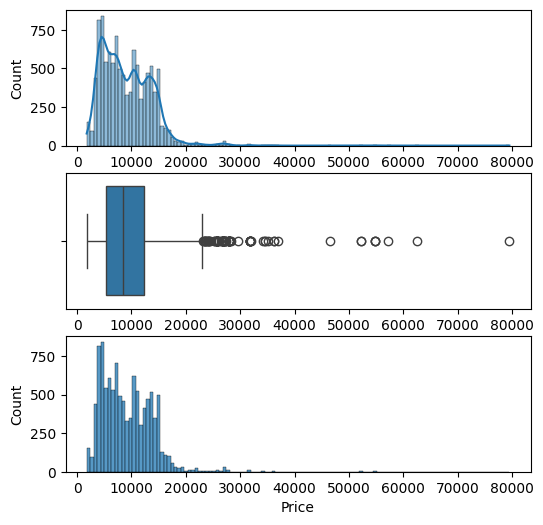

In [92]:
def plot(df, col):
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(6, 6))
    
    sns.histplot(df[col], ax=ax1, kde=True)  # Use histplot for distribution with KDE
    sns.boxplot(x=df[col], ax=ax2)  # boxplot expects x or y argument for data
    sns.histplot(df[col], ax=ax3, kde=False)  # Use histplot without KDE

plot(data, 'Price')

1. By observing the graph we say that we have positive skewness
2. To deal with this type we can do it by IQR 
3. Minimum value = Q1 - 1.5* IQR and Maximum value  = Q3 + 1.5* IQR
4. Any thing below or above it is considered as outlier 

In [93]:
q1 = data['Price'].quantile(0.25)
q3 = data['Price'].quantile(0.75)

iqr = q3 - q1
minimum = q1 - 1.5*iqr
maximum = q3 + 1.5*iqr

In [94]:
print(maximum)
print(minimum)

23017.0
-5367.0


List comprehenstion 

In [95]:
print([price for price in data['Price'] if price > maximum or price < minimum])

[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


Following numbers of outliers we have in the price column

In [96]:
len([price for price in data['Price'] if price > maximum or price < minimum])

94

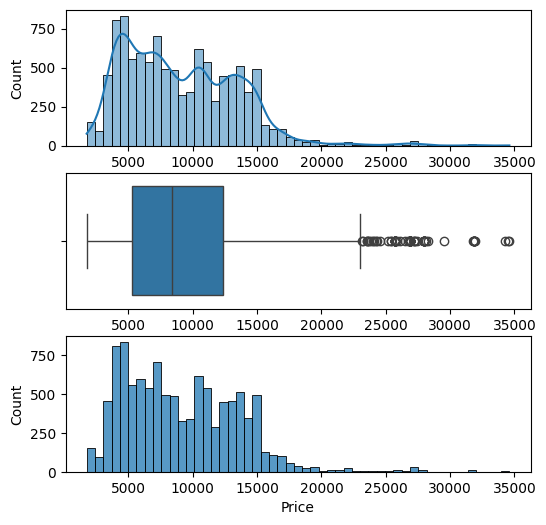

In [97]:
data['Price'] = np.where(data['Price']>= 35000, data['Price'].median(), data['Price'])
plot(data, 'Price')

By observing the above graph we can say that the skewness of the data or the presence of outliers have been diminshed 

## Feature Selection

1. Seperating the other columns from Price

In [98]:
X = data.drop(['Price'], axis = 1)

In [99]:
y = data['Price']

Mutual Information metric 

Used to determiner which feature are independent or dependent on each other

In [100]:
from sklearn.feature_selection import mutual_info_regression

imp = mutual_info_regression(X, y)

In [101]:
imp

array([1.32050025, 1.05555918, 0.79436676, 0.36321265, 0.62592632,
       0.92072905, 0.76475023, 1.15357497, 0.89943685, 1.12150202,
       0.66977649, 1.77347201, 0.38831001, 0.45871539, 0.51931022,
       0.1384023 , 0.19344068])

In [102]:
imp_df = pd.DataFrame(imp, index = X.columns)


In [103]:
imp_df.columns = ['importance']

In [104]:
imp_df.sort_values('importance', ascending = False)

,importance
Duration_Total_Minutes,1.773472
Airline,1.320500
Arrival_Time_hour,1.153575
Duration_Hour,1.121502
Destination,1.055559
Dep_Time_hour,0.920729
Arrival_Time_min,0.899437
Total_Stops,0.794367
Dep_Time_min,0.764750
Duration_Minutes,0.669776


In [105]:
data.head(3)

,Airline,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_Hour,Duration_Minutes,Duration_Total_Minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897.0,24,3,22,20,1,10,2,50,170,1,0,0,0,0
1,7,3,2,7662.0,1,5,5,50,13,15,7,25,445,0,1,0,0,0
2,10,4,2,13882.0,9,6,9,25,4,25,19,0,1140,0,0,1,0,0


In [106]:
data.columns

Index(['Airline', 'Destination', 'Total_Stops', 'Price', 'Journey_day',
       'Journey_month', 'Dep_Time_hour', 'Dep_Time_min', 'Arrival_Time_hour',
       'Arrival_Time_min', 'Duration_Hour', 'Duration_Minutes',
       'Duration_Total_Minutes', 'Source_Banglore', 'Source_Kolkata',
       'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

# Model buliding

### Training data from this our model will learn some realtion between features and target fatures

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
# random state 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, random_state = 42
)

### ensemble approach - learns from many models and at last we combine all the learning 

In [109]:
from sklearn.ensemble import RandomForestRegressor

In [110]:
ml_model = RandomForestRegressor()

In [111]:
ml_model.fit(X_train, y_train)

RandomForestRegressor()

In [112]:
y_pred = ml_model.predict(X_test)

In [113]:
y_pred

array([16890.05      ,  5435.32      ,  8850.56      , ...,
        3551.47      ,  6425.01333333,  6887.75      ])

1. Now we will calcualte the r2_score

In [114]:
from sklearn import metrics

In [115]:
metrics.r2_score(y_test, y_pred)

0.815828368816899

### Above is the accuracy 

# Saving of the Model
1. Often know as model dumping

In [116]:
import pickle

In [117]:
file = open(r'C:\Users\KIIT\OneDrive\Desktop\Udemy_Courses\rf_random.pkl', 'wb')

In [118]:
pickle.dump

<function _pickle.dump(obj, file, protocol=None, *, fix_imports=True, buffer_callback=None)>

### Opening the Model which is stored in pickle file at the mentioned location

In [119]:
model = open(r'C:\Users\KIIT\OneDrive\Desktop\Udemy_Courses', 'rb')

In [120]:
forest = pickle.load(model)

In [121]:
y_pred2 = forest.predict(X_test)

In [122]:
metrics.r2_score(y_test, y_pred2)

0.8208066143410367

# How to define you evaluation metrix and How to automate ML pipeline

In [123]:
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs(y_pred - y_true)/ y_true ) * 100

In [124]:
mape(y_test, y_pred)

13.188865786859584

# Making the automation for the model building different scores

In [125]:
from sklearn import metrics

In [126]:
def predict(ml_model):
    model = ml_model.fit(X_train, y_train)
    print('Training Score is {}'.format(model.score(X_train, y_train)))
    y_prediction = model.predict(X_test)
    print('predictions {}'.format(y_prediction))
    print('\n')
    r2_score = metrics.r2_score(y_test, y_prediction)
    print('r2 score : {}'.format(r2_score))
    print('MAE  : {}'.format(metrics.mean_absolute_error(y_test, y_prediction)))
    print('MSA  : {}'.format(metrics.mean_squared_error(y_test, y_prediction)))
    print('MAPE : {}'.format(metrics.mean_absolute_percentage_error(y_test, y_prediction)))
    print('RMSE : {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_prediction))))
    sns.distplot(y_test - y_prediction)
    
    
    

Training Score is 0.950963832399889
predictions [16804.37  5515.36  8810.68 ...  3500.81  6635.88  6886.2 ]


r2 score : 0.8149393266263466
MAE  : 1170.774267439599
MSA  : 3602687.1030532117
MAPE : 0.13168190091275972
RMSE : 1898.0745778428231


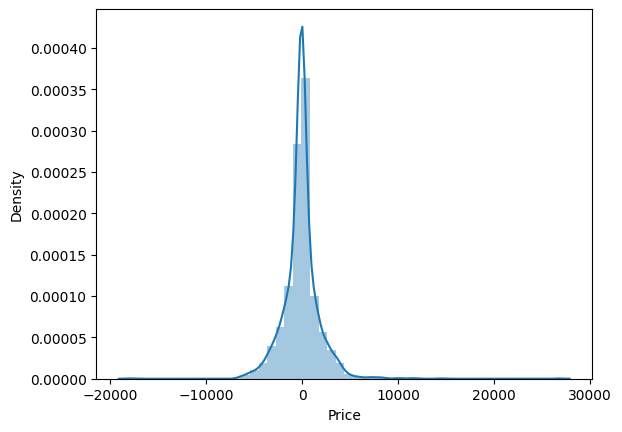

In [127]:
predict(RandomForestRegressor())

## finding the above
1. This is how we do automation in ML
2. Distribution of the given curve is Normal distribution
3. Need to understand more about the graph 

# Cross validation 
